In [11]:
!pip install scikit-learn pandas matplotlib

In [12]:
# Standard data science imports
import pandas as pd
import numpy as np

# Importing the dataset
from sklearn.datasets import load_breast_cancer


In [13]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target


In [14]:
# Shape of the dataset
print("🔢 Shape of dataset:", df.shape)

# Display class labels
print("🎯 Target classes:", data.target_names)

# Show how many malignant and benign
print("📊 Value counts:\n", df['target'].value_counts())

# First 5 rows of the data
df.head()


🔢 Shape of dataset: (569, 31)
🎯 Target classes: ['malignant' 'benign']
📊 Value counts:
 target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
# Show all feature names
print("📚 Features:\n", data.feature_names)


📚 Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# 1. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA: reduce dimensions to 4
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Output shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (455, 4)
X_test shape: (114, 4)


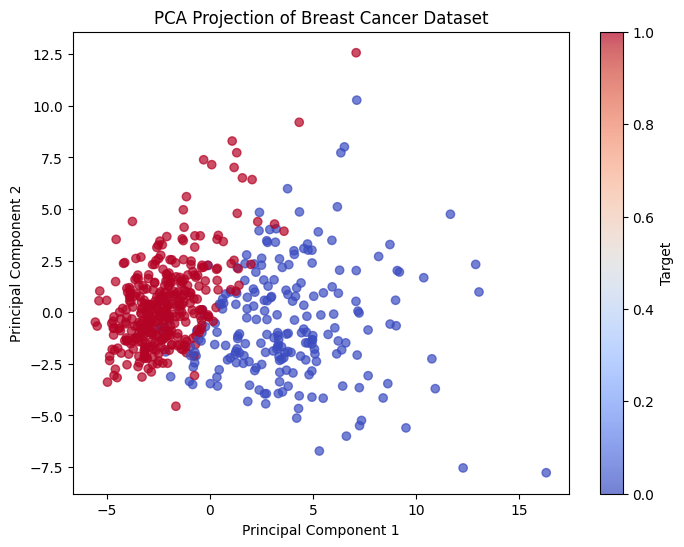

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Breast Cancer Dataset')
plt.colorbar(label='Target')
plt.show()


In [17]:
!pip install pennylane


In [18]:
# Load and prepare the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize features and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Truncate input features to match qubits (e.g., 8 qubits)
n_qubits = 8
X_train = X_train[:, :n_qubits]
X_test = X_test[:, :n_qubits]


In [20]:
# Install and import PennyLane
!pip install pennylane --quiet

import pennylane as qml
from pennylane import numpy as np

# Define number of qubits and layers
n_qubits = 8
n_layers = 3

# Set up quantum device
dev = qml.device("default.qubit", wires=n_qubits)

# Define the quantum circuit
@qml.qnode(dev)
def circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Y')
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

# Define weight shape
weight_shapes = {"weights": (n_layers, n_qubits, 3)}


In [23]:
acc_history = []


In [26]:
# Training loop
for epoch in range(epochs):
    loss = 0
    correct = 0  # For accuracy
    for x, y in zip(X_train, y_train):
        pred = circuit(x, weights)
        pred_label = 1 if pred >= 0 else 0
        correct += (pred_label == y)

        error = (pred - (2*y - 1))**2
        loss += error

        # Gradient descent (simplified)
        grad = qml.grad(lambda w: (circuit(x, w) - (2*y - 1))**2)(weights)
        weights = weights - learning_rate * grad

    avg_loss = loss / len(X_train)
    accuracy = correct / len(X_train)

    loss_history.append(avg_loss)
    acc_history.append(accuracy)

    print(f"Epoch {epoch+1}: loss = {avg_loss:.4f}, accuracy = {accuracy:.4f}")


Epoch 1: loss = 0.5673, accuracy = 0.7868
Epoch 2: loss = 0.5672, accuracy = 0.7868
Epoch 3: loss = 0.5672, accuracy = 0.7868
Epoch 4: loss = 0.5672, accuracy = 0.7868
Epoch 5: loss = 0.5672, accuracy = 0.7868
Epoch 6: loss = 0.5672, accuracy = 0.7868
Epoch 7: loss = 0.5672, accuracy = 0.7868
Epoch 8: loss = 0.5672, accuracy = 0.7868
Epoch 9: loss = 0.5672, accuracy = 0.7868
Epoch 10: loss = 0.5672, accuracy = 0.7868
Epoch 11: loss = 0.5672, accuracy = 0.7868
Epoch 12: loss = 0.5671, accuracy = 0.7868
Epoch 13: loss = 0.5671, accuracy = 0.7868
Epoch 14: loss = 0.5671, accuracy = 0.7868
Epoch 15: loss = 0.5671, accuracy = 0.7890
Epoch 16: loss = 0.5671, accuracy = 0.7890
Epoch 17: loss = 0.5671, accuracy = 0.7890
Epoch 18: loss = 0.5670, accuracy = 0.7912
Epoch 19: loss = 0.5670, accuracy = 0.7912
Epoch 20: loss = 0.5670, accuracy = 0.7912


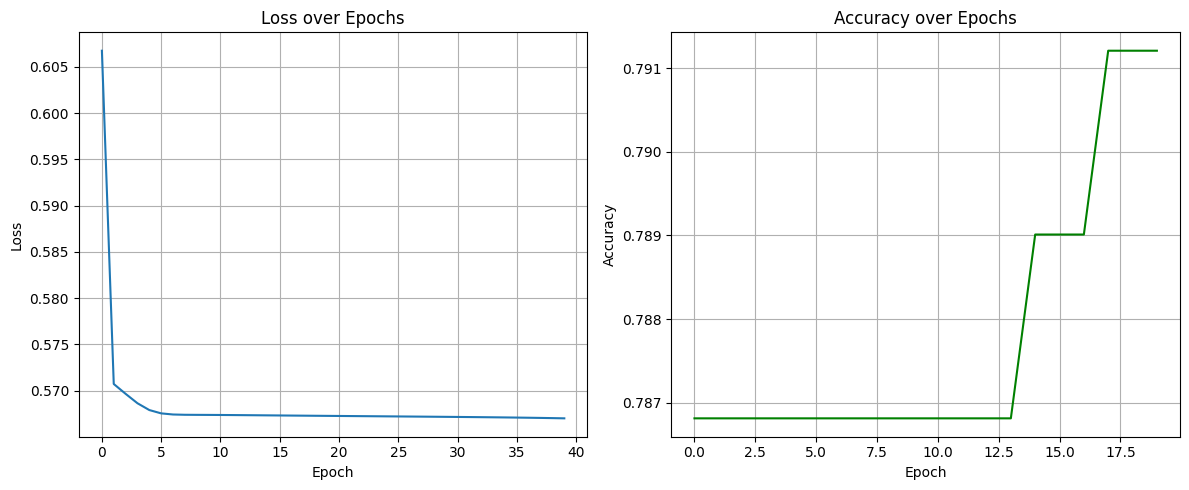

In [27]:
import matplotlib.pyplot as plt

# Example: after your training loop
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(acc_history, label="Accuracy", color='green')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


In [28]:
correct = 0

for x, y in zip(X_test, y_test):
    pred = circuit(x, weights)
    pred_label = 1 if pred >= 0 else 0
    correct += (pred_label == y)

test_accuracy = correct / len(X_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7807


In [29]:
np.save("trained_weights.npy", weights)


In [31]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define number of qubits and layers
n_qubits = 4
n_layers = 2

# Create a quantum device
dev = qml.device("default.qubit", wires=n_qubits)

# Define a circuit with random inputs and weights for visualization
@qml.qnode(dev)
def visualize_circuit():
    sample_input = np.random.randn(n_qubits)
    sample_weights = np.random.randn(n_layers, n_qubits, 3)

    qml.AngleEmbedding(sample_input, wires=range(n_qubits), rotation='Y')
    qml.StronglyEntanglingLayers(sample_weights, wires=range(n_qubits))
    
    return qml.expval(qml.PauliZ(0))

# Draw and print the quantum circuit as ASCII
print(qml.draw(visualize_circuit)())


0: ─╭AngleEmbedding(M0)─╭StronglyEntanglingLayers(M1)─┤  <Z>
1: ─├AngleEmbedding(M0)─├StronglyEntanglingLayers(M1)─┤     
2: ─├AngleEmbedding(M0)─├StronglyEntanglingLayers(M1)─┤     
3: ─╰AngleEmbedding(M0)─╰StronglyEntanglingLayers(M1)─┤     

M0 = 
[ 0.92683681 -0.99084396 -0.21506366 -0.30391092]
M1 = 
[[[ 0.80217912  0.39985372 -0.15032337]
  [-0.00480333 -0.18442631 -0.20455445]
  [ 0.14326226  1.00122334  0.25976382]
  [ 1.82711898  1.72260631  0.95894014]]

 [[-0.70108882 -1.34160824  1.78352521]
  [ 0.68554845  0.15204566  1.66081596]
  [-0.89864228 -0.28845744  0.66638267]
  [ 0.39346     0.26323128 -0.7326642 ]]]
